In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp

import pysindy as ps

import os

import math  
import sys  
sys.path.append('C:/Users/j/hotai/myfolder')

from my_function import miscore, siscore
# Ignore matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Seed the random number generators for reproducibility
np.random.seed(100)

integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

addp=5
startp=90
endp=120
dp=endp-startp
p_tot=addp*(dp-1)+1
file_tot=100
n=25
xstart=0
xend=25

In [2]:
def read_data(file_path,file_name,n,file_start=0,file_end=0,xstart=0,xend=0):
    x=np.zeros((121,n,n))
    y=np.zeros((121,n,n))
    vx=np.zeros((121,n,n))
    vy=np.zeros((121,n,n))
    for i in range(file_start,file_end):
        xp=[]
        yp=[]
        vxp=[]
        vyp=[]
        isvalid=[]
        xtmp=[]
        ytmp=[]
        vxtmp=[]
        vytmp=[]
        isvalidtmp=[]
        
        for root,dirs,files in os.walk(file_path):
            #print(root)
            
            for dir in dirs:
                #print(os.path.join(root,file))
                
    
                    with open(os.path.join(root,dir,file_name[i]), 'r') as f:  
                        lines = f.readlines()
                        for line in lines[3:]: 
                            num=line.split()
                            xtmp.append(float(num[0]))
                            ytmp.append(float(num[1]))
                            vxtmp.append(float(num[2]))
                            vytmp.append(float(num[3]))
                            isvalidtmp.append(float(num[4]))
        
                    xp.append(np.array(xtmp).reshape(25,25))
                    yp.append(np.array(ytmp).reshape(25,25))
                    vxp.append(np.array(vxtmp).reshape(25,25))
                    vyp.append(np.array(vytmp).reshape(25,25))
                    isvalid.append(np.array(isvalidtmp).reshape(25,25))
                    xtmp=[]
                    ytmp=[]
                    vxtmp=[]
                    vytmp=[]
                    isvalidtmp=[]
        #
        xp=np.array(xp)
        yp=np.array(yp)
        vxp=np.array(vxp)
        vyp=np.array(vyp)
        isvalid=np.array(isvalid)
        x=x+xp/file_tot
        y=y+yp/file_tot
        vx=vx+vxp/file_tot
        vy=vy+vyp/file_tot
    x=x.T
    x=x[xstart:xend,xstart:xend]
    y=y.T
    y=y[xstart:xend,xstart:xend]
    vx=vx.T
    vx=vx[xstart:xend,xstart:xend]
    vy=vy.T
    vy=vy[xstart:xend,xstart:xend]
    isvalid=isvalid.T
    isvalid=isvalid[xstart:xend,xstart:xend]
    return x,y,vx,vy

In [3]:
file_path = os.path.join('D:\\', 'hotaidata','sr_C6_01')
file_name=['B00001.dat','B00002.dat','B00003.dat','B00004.dat','B00005.dat','B00006.dat','B00007.dat','B00008.dat',
           'B00009.dat','B00010.dat','B00011.dat','B00012.dat','B00013.dat','B00014.dat','B00015.dat','B00016.dat','B00017.dat',
           'B00018.dat','B00019.dat','B00020.dat','B00021.dat','B00022.dat','B00023.dat','B00024.dat','B00025.dat','B00026.dat',
           'B00027.dat','B00028.dat','B00029.dat','B00030.dat','B00031.dat','B00032.dat','B00033.dat','B00034.dat','B00035.dat',
           'B00036.dat','B00037.dat','B00038.dat','B00039.dat','B00040.dat','B00041.dat','B00042.dat','B00043.dat','B00044.dat',
           'B00045.dat','B00046.dat','B00047.dat','B00048.dat','B00049.dat','B00050.dat','B00051.dat','B00052.dat','B00053.dat',
           'B00054.dat','B00055.dat','B00056.dat','B00057.dat','B00058.dat','B00059.dat','B00060.dat','B00061.dat','B00062.dat',
           'B00063.dat','B00064.dat','B00065.dat','B00066.dat','B00067.dat','B00068.dat','B00069.dat','B00070.dat','B00071.dat',
           'B00072.dat','B00073.dat','B00074.dat','B00075.dat','B00076.dat','B00077.dat','B00078.dat','B00079.dat','B00080.dat',
           'B00081.dat','B00082.dat','B00083.dat','B00084.dat','B00085.dat','B00086.dat','B00087.dat','B00088.dat','B00089.dat',
           'B00090.dat','B00091.dat','B00092.dat','B00093.dat','B00094.dat','B00095.dat','B00096.dat','B00097.dat','B00098.dat',
           'B00099.dat','B00100.dat']
x=np.zeros((121,n,n))
y=np.zeros((121,n,n))
vx=np.zeros((121,n,n))
vy=np.zeros((121,n,n))

x,y,vx,vy=read_data(file_path,file_name,25,0,50,xstart,xend)
#print(x[0,:,:])
t=np.linspace(0,60/800,121)
dt=t[1]-t[0]

t=t[startp:endp]
print(len(t))
t_train=np.linspace(t[0],t[-1],addp*(len(t)-1)+1)
dt_train=t_train[1]-t_train[0]
print(len(t_train.shape))

30
1


In [4]:
#u is not pre adding, v add a median
spatial_grid = np.asarray([x[:,:,0].T,y[:,:,0].T]).T

n=xend-xstart

u=np.zeros((n,n,121, 2))

u[:, :, :, 0] = vx
u[:, :, :, 1] = vy

u_train=np.zeros((n,n,len(t), 2))
u_train=u[:,:,startp:endp,:]

v_train=np.zeros((n,n,len(t_train),2))

for i in range(len(t)-1):
    for j in range(addp):
        v_train[:,:,addp*i+j]=(u_train[:,:,i]*(addp-j)+u_train[:,:,i+1]*j)/addp
v_train[:,:,-1]=u_train[:,:,-1]


<function matplotlib.pyplot.show(close=None, block=None)>

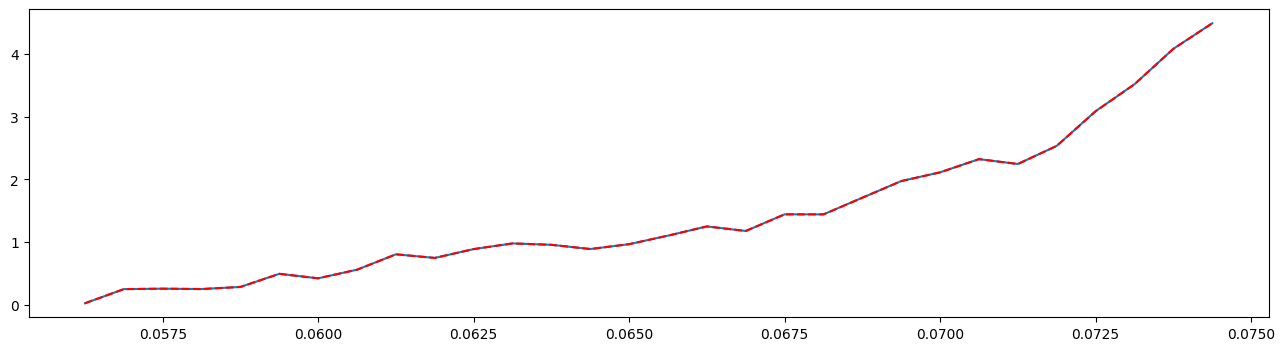

In [5]:
op=np.zeros(len(t))
op=u_train[10,10,:,0]
op_train=np.zeros(len(t_train))
for i in range(len(t)-1):
    for j in range(addp):
        op_train[i*addp+j]=(op[i]*(addp-j)+op[i+1]*j)/addp
op_train[-1]=op[-1]
plt.figure(figsize=(16, 4))
plt.plot(t,op)
plt.plot(t_train,op_train,'r--')
plt.show

In [6]:
v_train_dot = ps.FiniteDifference(axis=2)._differentiate(v_train, dt_train)

vtmp=np.zeros(v_train_dot.shape)
vtmp[:,:,0]=v_train[:,:,0]
for i in range(len(t_train)-1):
    vtmp[:,:,i+1]=vtmp[:,:,i]+v_train_dot[:,:,i]*dt_train
miscore(vtmp,v_train)
siscore(vtmp,v_train)
vtmp=v_train+v_train_dot*dt_train

vtmp[:,:,1:]=vtmp[:,:,:len(t_train)-1]
miscore(vtmp,v_train)
siscore(vtmp,v_train)


MI(average/percent):
0.9957774001416696 0.9997569597878921
SI(average/percent):
0.9998263561076857 0.9999116217410517
MI(average/percent):
0.9991837746583707 0.9999779054352629
SI(average/percent):
0.9999617818254646 0.9999779054352629


(0.9999617818254646, 0.9999779054352629)

In [7]:
# Define PDE library that is quadratic in u, and
# fourth-order in spatial derivatives of u.    periodic=True

library_functions = [
    lambda y: y,
    lambda x: x*x,
    
    lambda x, y: x * y,
    lambda x, y: x * x * y,
]
library_function_names = [
    lambda y: y,
    lambda x: x+x,
    
    lambda x, y: x + y,
    lambda x, y: x + x + y,
]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=1,
    spatial_grid=spatial_grid,
    include_bias=True,
    is_uniform=True
    
)




print('SINDy')
model = ps.SINDy(feature_names=['Vx','Vy'])

model.fit(v_train, x_dot=v_train_dot)
model.print()
#u_dot_stlsq = model.predict(v_train)x_dot=v_train_dot
'''
print('STLSQ model: ')
optimizer = ps.STLSQ(threshold=50, alpha=1e-5, 
                     normalize_columns=True, max_iter=200)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer,feature_names=['Vx','Vy'])
model.fit(v_train, dt_train)
model.print()'''

SINDy
(Vx)' = 34.867 1 + 21.938 Vx + -47.598 Vy + 11.229 Vx^2 + 1.037 Vx Vy + 7.361 Vy^2
(Vy)' = -71.439 1 + 29.710 Vx + -5.892 Vy + -1.040 Vx^2 + -8.590 Vx Vy + -3.167 Vy^2


"\nprint('STLSQ model: ')\noptimizer = ps.STLSQ(threshold=50, alpha=1e-5, \n                     normalize_columns=True, max_iter=200)\nmodel = ps.SINDy(feature_library=pde_lib, optimizer=optimizer,feature_names=['Vx','Vy'])\nmodel.fit(v_train, dt_train)\nmodel.print()"

In [8]:
print("Model score: %f" % model.score(u_train, t=t))
print("Model score: %f" % model.score(u_train, t=dt))
print("Model score: %f" % model.score(v_train, t=t_train))
print("Model score: %f" % model.score(v_train, t=dt_train))

Model score: 0.179463
Model score: 0.179463
Model score: 0.133821
Model score: 0.133821


In [9]:
x_test,y_test,vx_test,vy_test=read_data(file_path,file_name,25,50,100,xstart,xend)


t_test=np.linspace(t[0],t[-1],addp*(len(t)-1)+1)
dt_test=t_test[1]-t_test[0]

si_t=np.zeros(p_tot)
mi_t=np.zeros(p_tot)
si_t_per=np.zeros(p_tot)
mi_t_per=np.zeros(p_tot)

In [10]:
#u is not pre adding, v add a median


n=xend-xstart


u[:, :, :, 0] = vx_test
u[:, :, :, 1] = vy_test

u_test=np.zeros((n,n,len(t), 2))
u_test=u[:,:,startp:endp,:]

v_test=np.zeros((n,n,len(t_test),2))
for i in range(len(t)-1):
    for j in range(addp):
        v_test[:,:,addp*i+j]=(u_test[:,:,i]*(addp-j)+u_test[:,:,i+1]*j)/addp
v_test[:,:,-1]=u_test[:,:,-1]


In [11]:
x_dot_test_predicted = model.predict(v_test)
x_dot_test_predicted=x_dot_test_predicted.reshape(n,n,p_tot,2)
tlen=len(t_train)
dot_tmp=np.array(x_dot_test_predicted)
pltpredict=np.zeros((n,n,tlen,2))
#print(dot_tmp[10,10])

In [12]:
print('add 7 point, from 80 to 120, with library x^3, derivative order 2, MI:0.6748241001379309, SI:0.8570345301079201')
print('add 7 point, from 80 to 120, with library x^3, derivative order 1, MI:0.6732771082529756, SI:0.8589308511150588')
print('add 7 point, from 80 to 120, with library x^2, derivative order 2, MI:0.6707939885275049, SI:0.8459658232811543')
print('add 7 point, from 80 to 120, with library x^2, derivative order 1, MI:0.6693806511354194, SI:0.8426666431380524')
print('add 7 point, from 90 to 120, with library x^2, derivative order 1, MI:0.6709005447980256, SI:0.8424080789942714')

pltpredict[:,:,0]=v_train[:,:,0]
for i in range(tlen-1):
    pltpredict[:,:,i+1]=pltpredict[:,:,i]+dot_tmp[:,:,i]*dt_train
miscore(pltpredict,v_test)
siscore(pltpredict,v_test)
#print(pltpredict[10,10])
#print(v_train[10,10])

add 7 point, from 80 to 120, with library x^3, derivative order 2, MI:0.6748241001379309, SI:0.8570345301079201
add 7 point, from 80 to 120, with library x^3, derivative order 1, MI:0.6732771082529756, SI:0.8589308511150588
add 7 point, from 80 to 120, with library x^2, derivative order 2, MI:0.6707939885275049, SI:0.8459658232811543
add 7 point, from 80 to 120, with library x^2, derivative order 1, MI:0.6693806511354194, SI:0.8426666431380524
add 7 point, from 90 to 120, with library x^2, derivative order 1, MI:0.6709005447980256, SI:0.8424080789942714
MI(average/percent):
0.866657302701027 0.8087715422006186
SI(average/percent):
0.8725165086659544 0.7849315068493151


(0.8725165086659544, 0.7849315068493151)

0


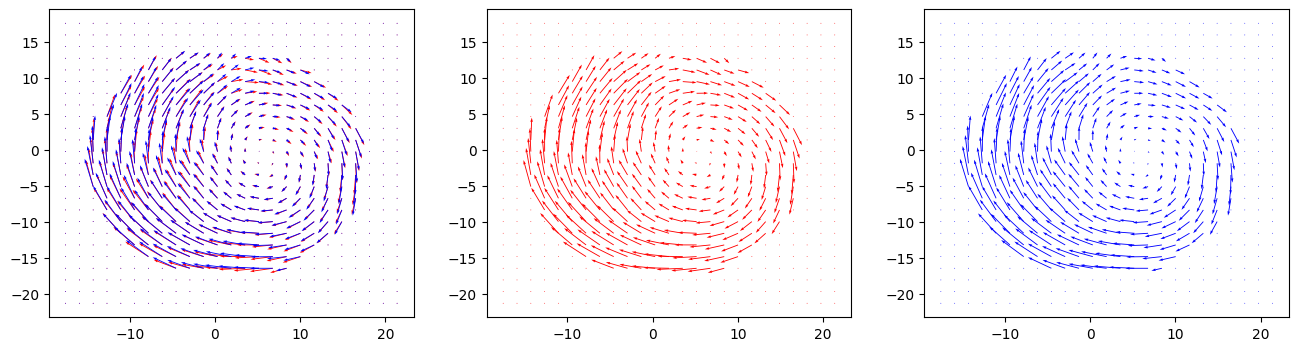

MI(average/percent):
0.9576396857385286 0.9838709677419355
SI(average/percent):
0.9952581640986122 1.0
1
MI(average/percent):
0.9604786781232251 0.9935483870967742
SI(average/percent):
0.9956539033837732 1.0
2
MI(average/percent):
0.9619924043326625 0.9967741935483871
SI(average/percent):
0.9958451762195474 1.0
3
MI(average/percent):
0.9630153859796834 0.9967741935483871
SI(average/percent):
0.9958408440515829 1.0
4
MI(average/percent):
0.96342925217441 1.0
SI(average/percent):
0.9956445790775318 1.0
5


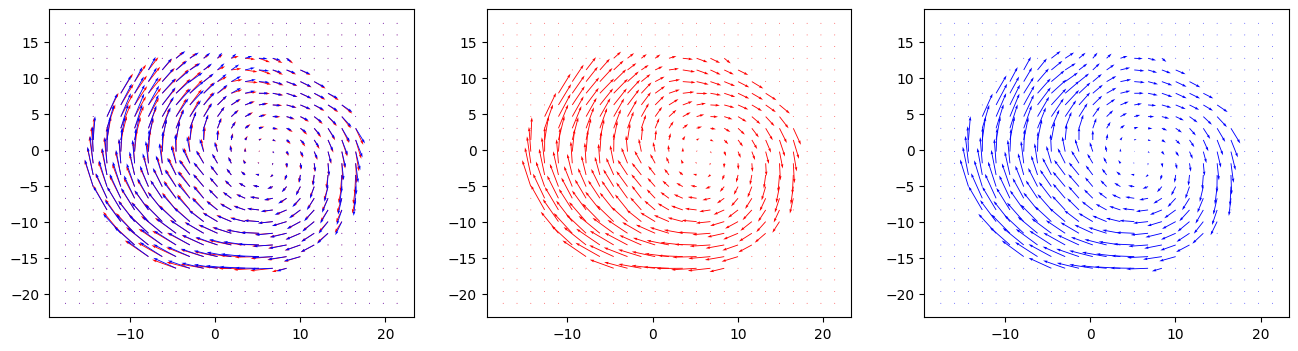

MI(average/percent):
0.9630847038134844 0.9967741935483871
SI(average/percent):
0.9952569310496959 1.0
6
MI(average/percent):
0.9647839293615631 0.9935483870967742
SI(average/percent):
0.9956417380027341 1.0
7
MI(average/percent):
0.9651512236529548 0.9967741935483871
SI(average/percent):
0.995783665722252 1.0
8
MI(average/percent):
0.9639713735231958 0.9967741935483871
SI(average/percent):
0.9956457116484174 1.0
9
MI(average/percent):
0.9613999067248903 0.9935483870967742
SI(average/percent):
0.9951817732706156 1.0
10


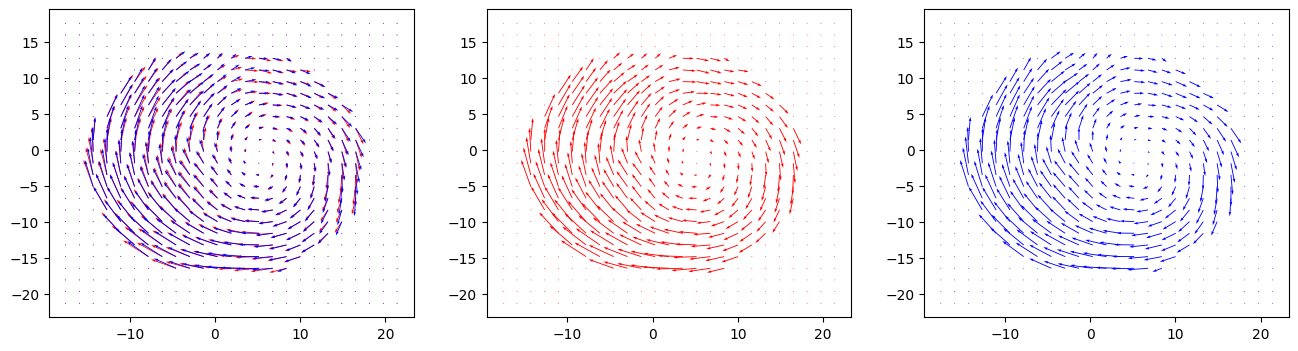

MI(average/percent):
0.9579240353791104 0.9903225806451613
SI(average/percent):
0.9942991936449616 1.0
11
MI(average/percent):
0.959804074795954 0.9903225806451613
SI(average/percent):
0.9938756266877404 1.0
12
MI(average/percent):
0.9609402154476108 0.9903225806451613
SI(average/percent):
0.9931377642871806 0.9967741935483871
13
MI(average/percent):
0.9611884102784469 0.9935483870967742
SI(average/percent):
0.9921244709732451 0.9935483870967742
14
MI(average/percent):
0.9605448388786515 0.9935483870967742
SI(average/percent):
0.9909034052210238 0.9935483870967742
15


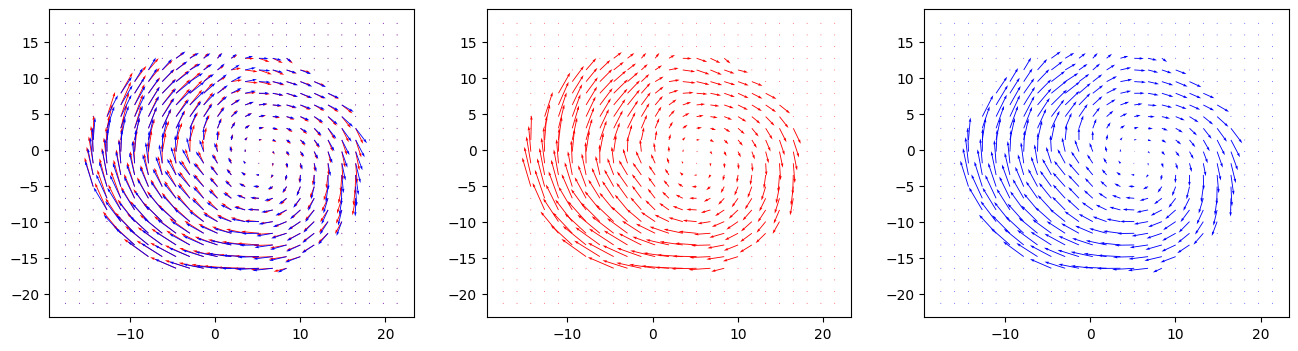

MI(average/percent):
0.9588253694425147 0.9967741935483871
SI(average/percent):
0.9895295212305755 0.9935483870967742
16
MI(average/percent):
0.9593820952568862 0.9935483870967742
SI(average/percent):
0.9905075940903575 0.9967741935483871
17
MI(average/percent):
0.9584636306614772 0.9967741935483871
SI(average/percent):
0.9912696276458834 0.9967741935483871
18
MI(average/percent):
0.9562798564458296 0.9967741935483871
SI(average/percent):
0.9917825309746512 0.9967741935483871
19
MI(average/percent):
0.9533593012237124 0.9967741935483871
SI(average/percent):
0.9920060014777374 1.0
20


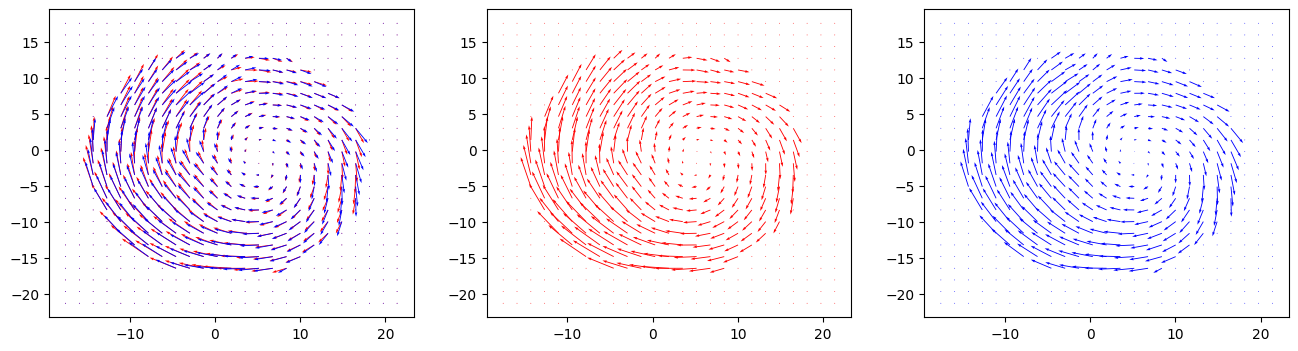

MI(average/percent):
0.9498141285371257 0.9935483870967742
SI(average/percent):
0.9919005812394169 1.0
21
MI(average/percent):
0.9487792948781094 0.9935483870967742
SI(average/percent):
0.9915450435526078 1.0
22
MI(average/percent):
0.9472817462821485 0.9935483870967742
SI(average/percent):
0.9910235937589367 1.0
23
MI(average/percent):
0.9448189894083274 0.9935483870967742
SI(average/percent):
0.9903428235165809 1.0
24
MI(average/percent):
0.9416534632110101 0.9903225806451613
SI(average/percent):
0.989507197277005 1.0
25


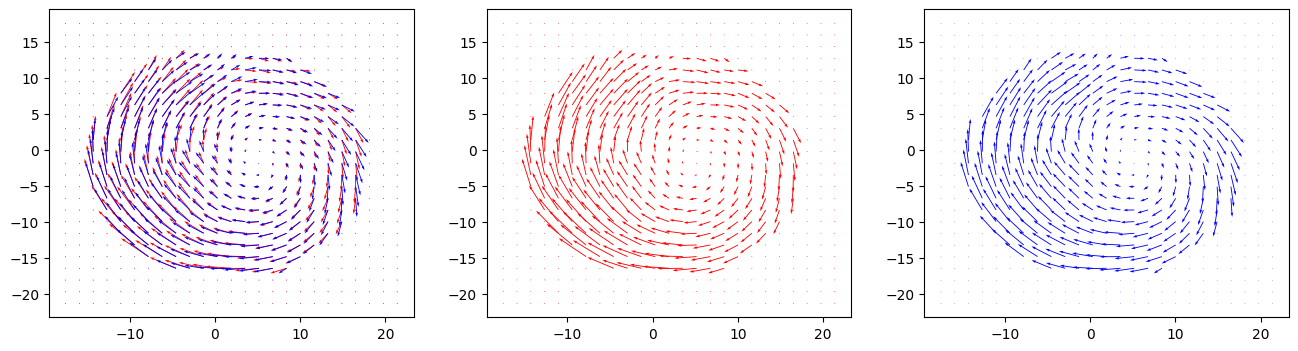

MI(average/percent):
0.9380716720513743 0.9903225806451613
SI(average/percent):
0.9885186930079797 1.0
26
MI(average/percent):
0.9387853304898676 0.9903225806451613
SI(average/percent):
0.987960942160429 1.0
27
MI(average/percent):
0.9389077151579839 0.9903225806451613
SI(average/percent):
0.9871499940312757 1.0
28
MI(average/percent):
0.938477098601049 0.9903225806451613
SI(average/percent):
0.9861176348223547 1.0
29
MI(average/percent):
0.9374620568775205 0.9935483870967742
SI(average/percent):
0.9848744016383228 0.9967741935483871
30


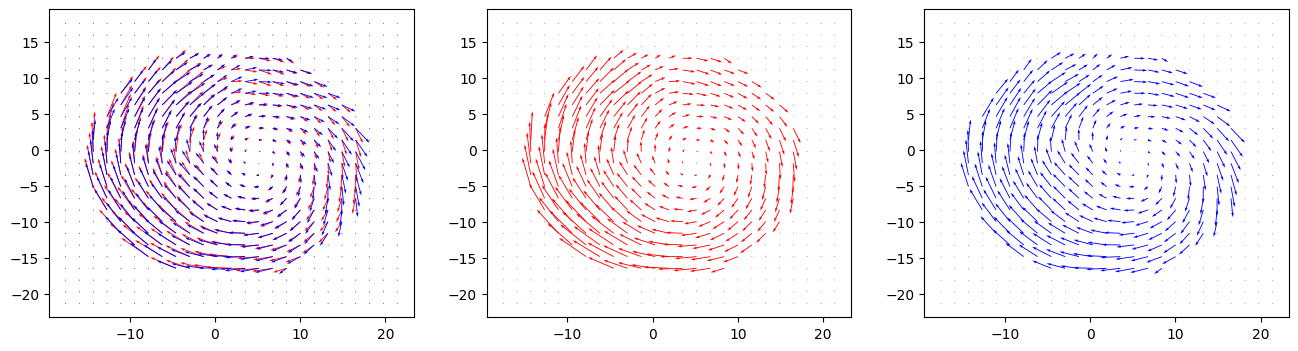

MI(average/percent):
0.9359406819067635 0.9935483870967742
SI(average/percent):
0.9834197568108455 0.9967741935483871
31
MI(average/percent):
0.937223127182967 0.9967741935483871
SI(average/percent):
0.9822334769340179 0.9935483870967742
32
MI(average/percent):
0.9378261696227234 0.9967741935483871
SI(average/percent):
0.980857857058322 0.9935483870967742
33
MI(average/percent):
0.9377026798830784 0.9903225806451613
SI(average/percent):
0.9792672761217756 0.9935483870967742
34
MI(average/percent):
0.936877960930027 0.9903225806451613
SI(average/percent):
0.9774454568300162 0.9935483870967742
35


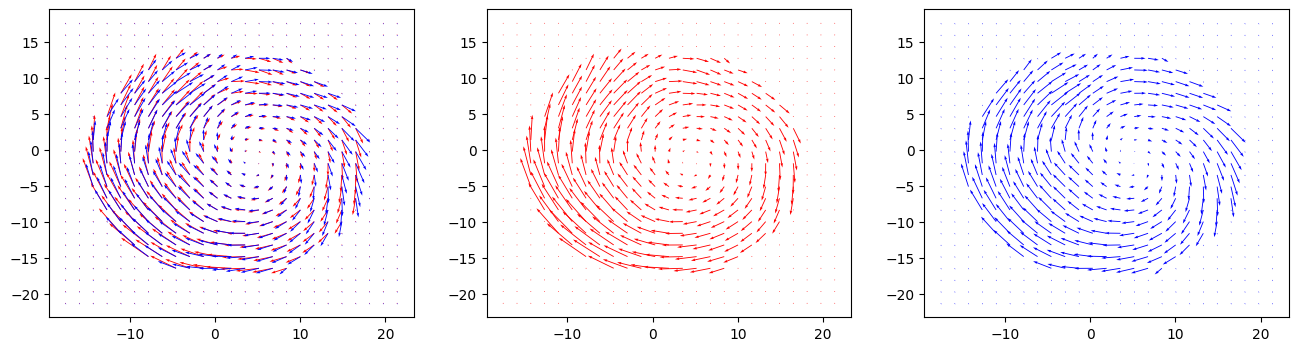

MI(average/percent):
0.9354390932168355 0.9903225806451613
SI(average/percent):
0.975383036480668 0.9903225806451613
36
MI(average/percent):
0.9326822103207395 0.9870967741935484
SI(average/percent):
0.9732275135837669 0.9903225806451613
37
MI(average/percent):
0.9292918075395317 0.9838709677419355
SI(average/percent):
0.9707053457398731 0.9870967741935484
38
MI(average/percent):
0.9253720187479358 0.9774193548387097
SI(average/percent):
0.9678831573478849 0.9838709677419355
39
MI(average/percent):
0.9210037910344236 0.9741935483870968
SI(average/percent):
0.9638491671130425 0.9774193548387097
40


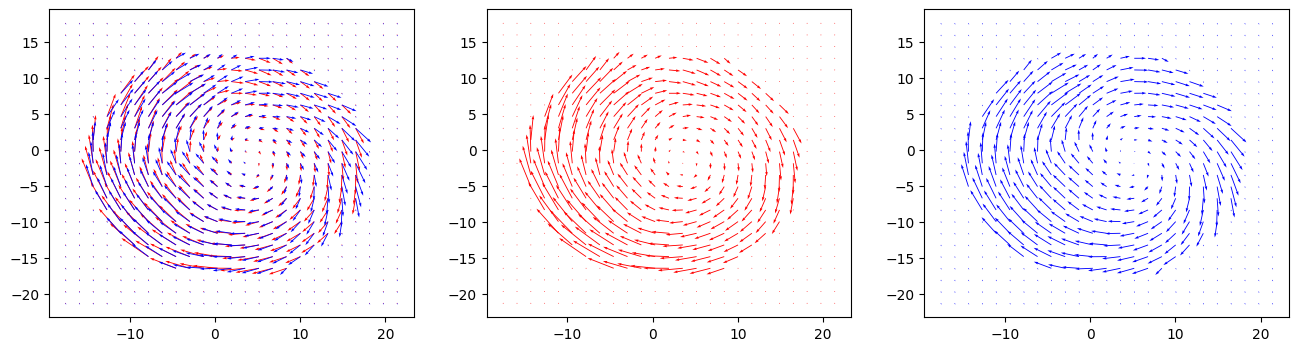

MI(average/percent):
0.9175136468554899 0.967741935483871
SI(average/percent):
0.9617623184449571 0.9774193548387097
41
MI(average/percent):
0.9138914556254452 0.9612903225806452
SI(average/percent):
0.9614176535355649 0.9774193548387097
42
MI(average/percent):
0.9097498401134634 0.9580645161290322
SI(average/percent):
0.960837155238564 0.9741935483870968
43
MI(average/percent):
0.9051507786997959 0.9483870967741935
SI(average/percent):
0.9599601910461574 0.9741935483870968
44
MI(average/percent):
0.9003950619590574 0.932258064516129
SI(average/percent):
0.9587329742058055 0.9741935483870968
45


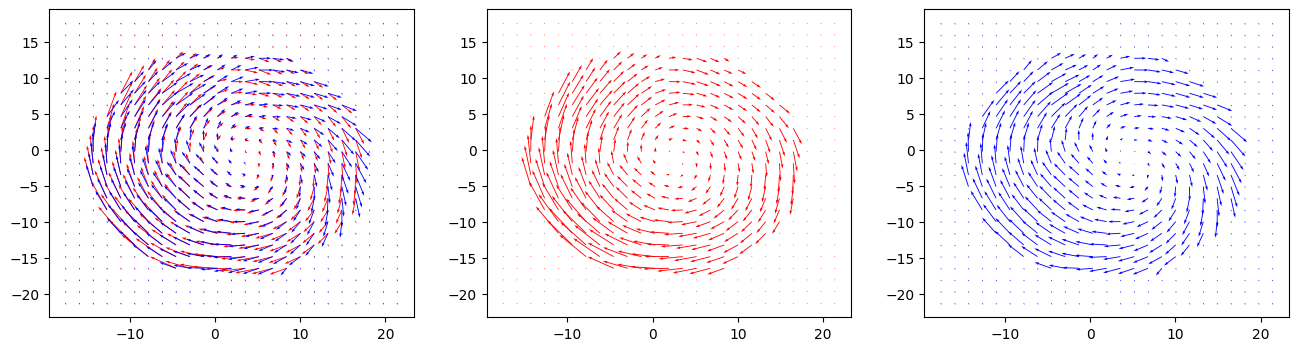

MI(average/percent):
0.8955081680880627 0.9193548387096774
SI(average/percent):
0.9570059842073715 0.964516129032258
46
MI(average/percent):
0.8948701909612112 0.9225806451612903
SI(average/percent):
0.9556787286525786 0.964516129032258
47
MI(average/percent):
0.8941310845073751 0.9225806451612903
SI(average/percent):
0.953980071076936 0.964516129032258
48
MI(average/percent):
0.8929812207365508 0.9225806451612903
SI(average/percent):
0.9524575479250129 0.964516129032258
49
MI(average/percent):
0.891688510057308 0.9225806451612903
SI(average/percent):
0.9506782505329615 0.9548387096774194
50


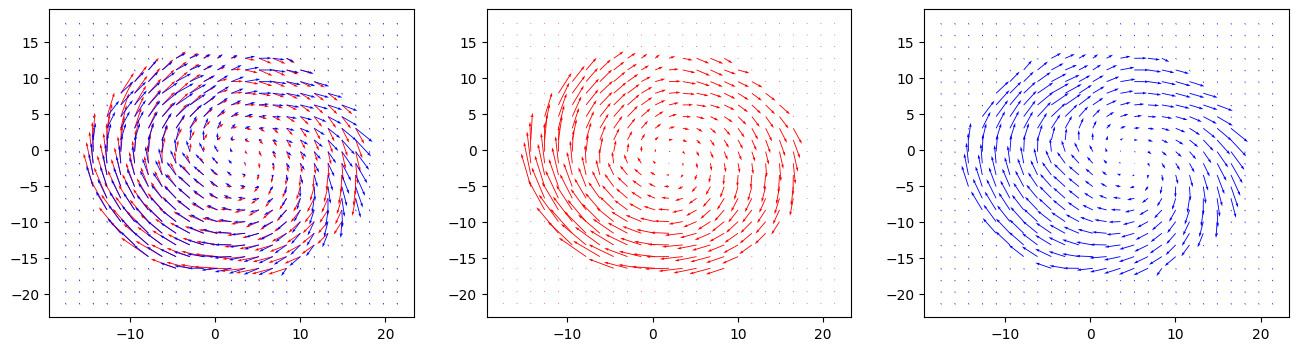

MI(average/percent):
0.8900077571404083 0.9161290322580645
SI(average/percent):
0.9484910767191058 0.9516129032258065
51
MI(average/percent):
0.8875149505304265 0.9096774193548387
SI(average/percent):
0.9453459555668827 0.9483870967741935
52
MI(average/percent):
0.8851167641750934 0.9032258064516129
SI(average/percent):
0.9437961415026176 0.9451612903225807
53
MI(average/percent):
0.8824270559104586 0.9
SI(average/percent):
0.941369147844489 0.932258064516129
54
MI(average/percent):
0.879710834494853 0.8903225806451613
SI(average/percent):
0.938339697019054 0.9225806451612903
55


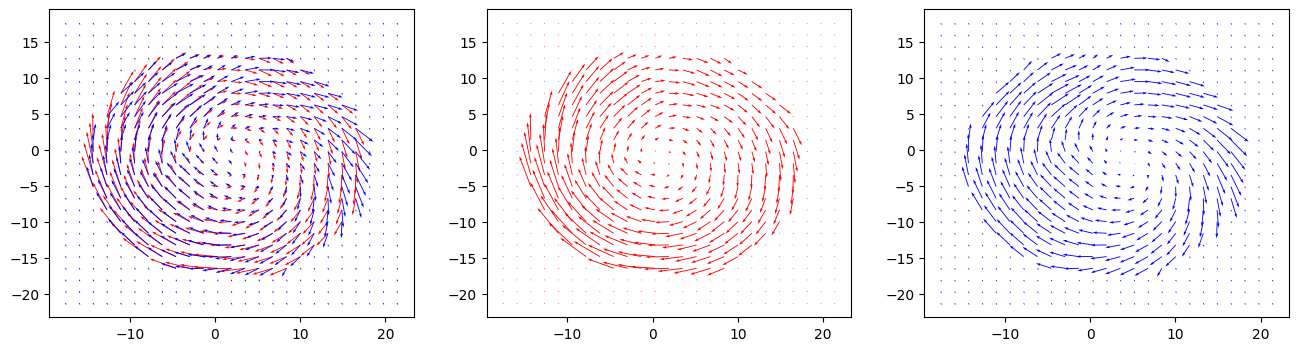

MI(average/percent):
0.8769585642354438 0.8806451612903226
SI(average/percent):
0.9348164643428281 0.9193548387096774
56
MI(average/percent):
0.8753615485582215 0.8838709677419355
SI(average/percent):
0.9315256239188238 0.9225806451612903
57
MI(average/percent):
0.8737090286569025 0.8870967741935484
SI(average/percent):
0.9278175009604211 0.9225806451612903
58
MI(average/percent):
0.8719611217071851 0.8774193548387097
SI(average/percent):
0.923662529087057 0.9193548387096774
59
MI(average/percent):
0.8702005067519595 0.8741935483870967
SI(average/percent):
0.9200331412262425 0.9225806451612903
60


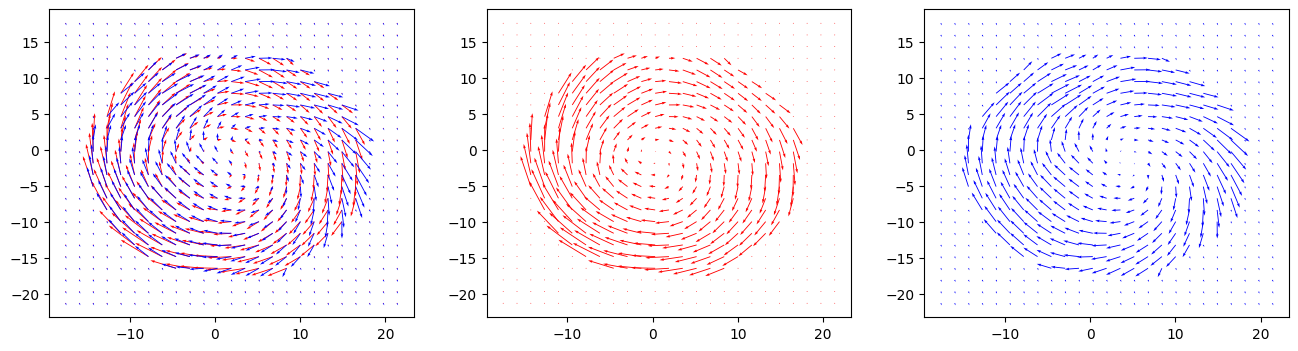

MI(average/percent):
0.8684430924756861 0.867741935483871
SI(average/percent):
0.916913987261265 0.9193548387096774
61
MI(average/percent):
0.8669260886987437 0.8612903225806452
SI(average/percent):
0.9140849639852315 0.9129032258064517
62
MI(average/percent):
0.8654699677038626 0.8709677419354839
SI(average/percent):
0.9109244877592544 0.9129032258064517
63
MI(average/percent):
0.8638978162434089 0.8741935483870967
SI(average/percent):
0.9075332368011696 0.9064516129032258
64
MI(average/percent):
0.8623981367569882 0.867741935483871
SI(average/percent):
0.9039037304105813 0.9
65


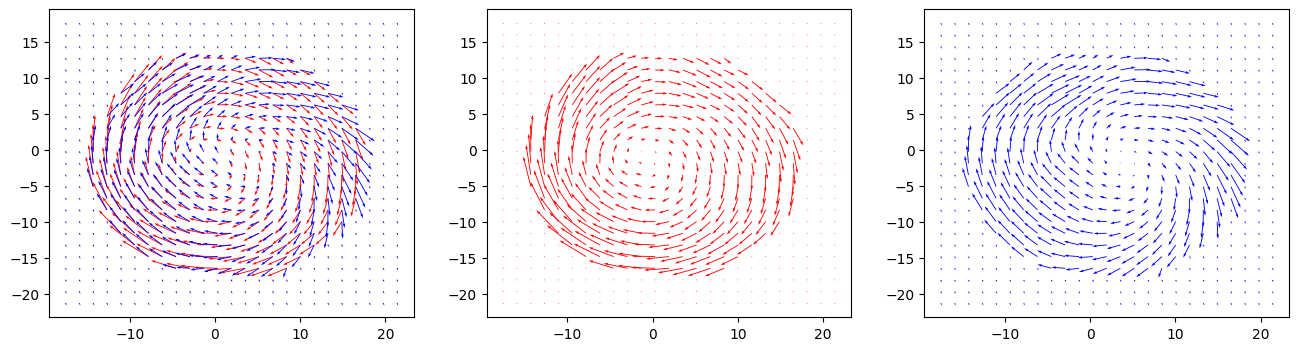

MI(average/percent):
0.8608228453026959 0.864516129032258
SI(average/percent):
0.9006821948186818 0.8935483870967742
66
MI(average/percent):
0.8588675237675352 0.8516129032258064
SI(average/percent):
0.8963282683361006 0.8870967741935484
67
MI(average/percent):
0.8568420208765665 0.832258064516129
SI(average/percent):
0.8946595197589381 0.8806451612903226
68
MI(average/percent):
0.8546497475136241 0.8193548387096774
SI(average/percent):
0.8911731576601308 0.8709677419354839
69
MI(average/percent):
0.8524601743064066 0.8
SI(average/percent):
0.8868857146276882 0.867741935483871
70


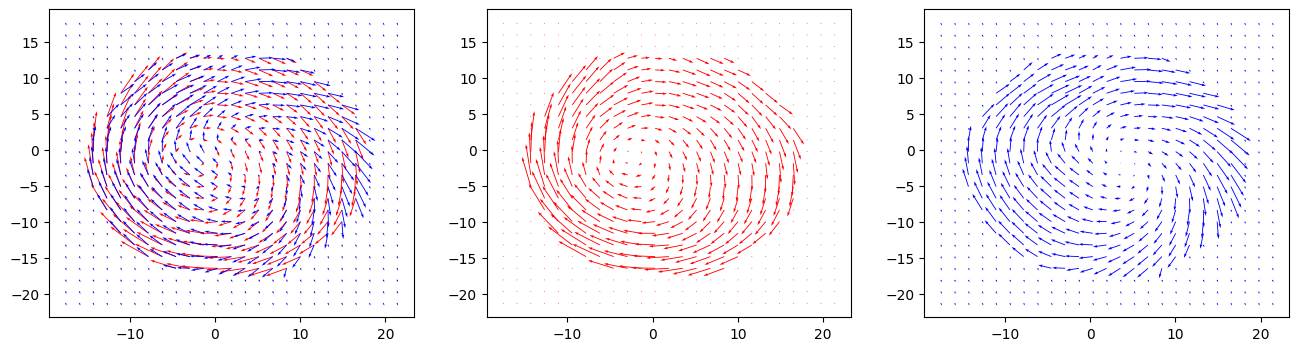

MI(average/percent):
0.8502107586930512 0.7870967741935484
SI(average/percent):
0.8822393686628542 0.8548387096774194
71
MI(average/percent):
0.8487212475477287 0.7838709677419354
SI(average/percent):
0.877554993275499 0.8451612903225807
72
MI(average/percent):
0.8473514936333688 0.7838709677419354
SI(average/percent):
0.8737864508993476 0.8290322580645161
73
MI(average/percent):
0.8460391584456722 0.7741935483870968
SI(average/percent):
0.870100206421886 0.8225806451612904
74
MI(average/percent):
0.8446196217215358 0.7709677419354839
SI(average/percent):
0.8658414986112524 0.8161290322580645
75


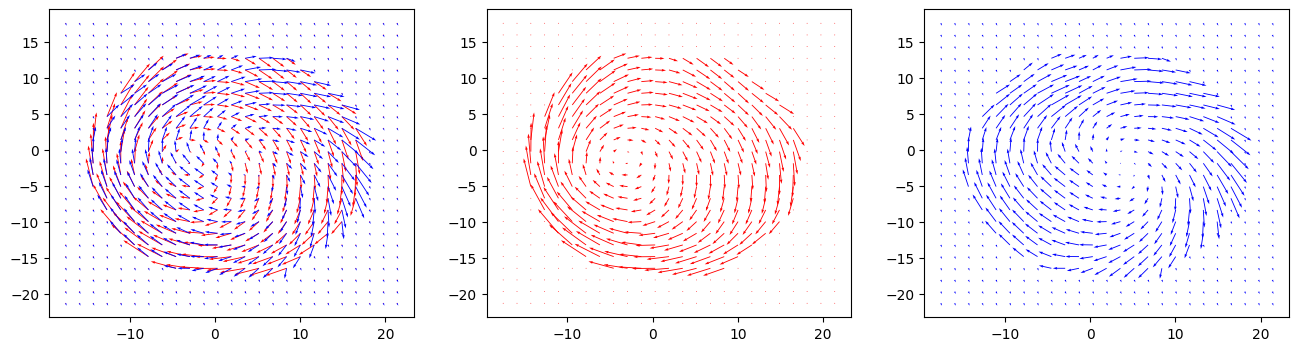

MI(average/percent):
0.8432603450784729 0.7580645161290323
SI(average/percent):
0.8610828666885191 0.7967741935483871
76
MI(average/percent):
0.843367296601665 0.7612903225806451
SI(average/percent):
0.8567862502520946 0.7870967741935484
77
MI(average/percent):
0.843354989010553 0.7645161290322581
SI(average/percent):
0.8523880215867689 0.7709677419354839
78
MI(average/percent):
0.8431323283255447 0.7645161290322581
SI(average/percent):
0.8485853465311882 0.7516129032258064
79
MI(average/percent):
0.842865561261133 0.7741935483870968
SI(average/percent):
0.8438957344520277 0.7290322580645161
80


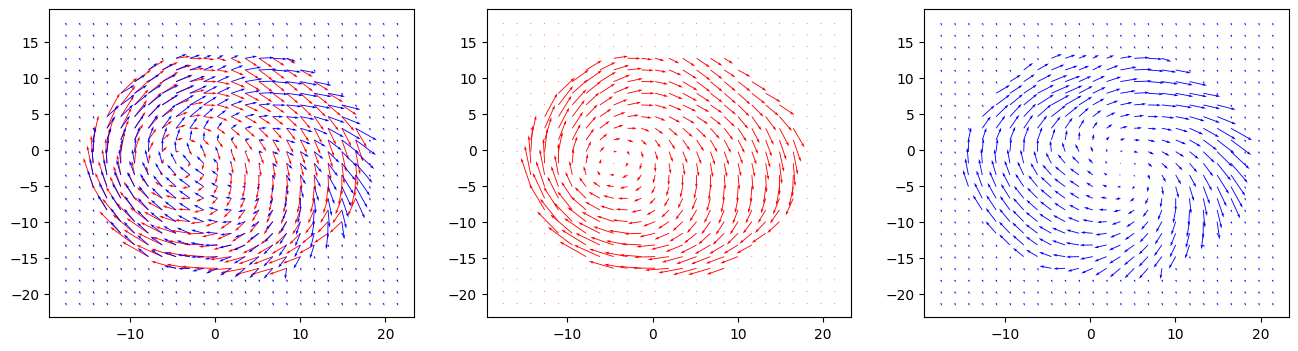

MI(average/percent):
0.84255184473771 0.7741935483870968
SI(average/percent):
0.8369105607769094 0.7064516129032258
81
MI(average/percent):
0.8420003538138624 0.7612903225806451
SI(average/percent):
0.8351181395836594 0.7064516129032258
82
MI(average/percent):
0.841340132014407 0.7612903225806451
SI(average/percent):
0.8320243584990652 0.6935483870967742
83
MI(average/percent):
0.8403144123492059 0.7580645161290323
SI(average/percent):
0.8281710834389377 0.6967741935483871
84
MI(average/percent):
0.8389523477613108 0.7548387096774194
SI(average/percent):
0.8238549266315564 0.6870967741935484
85


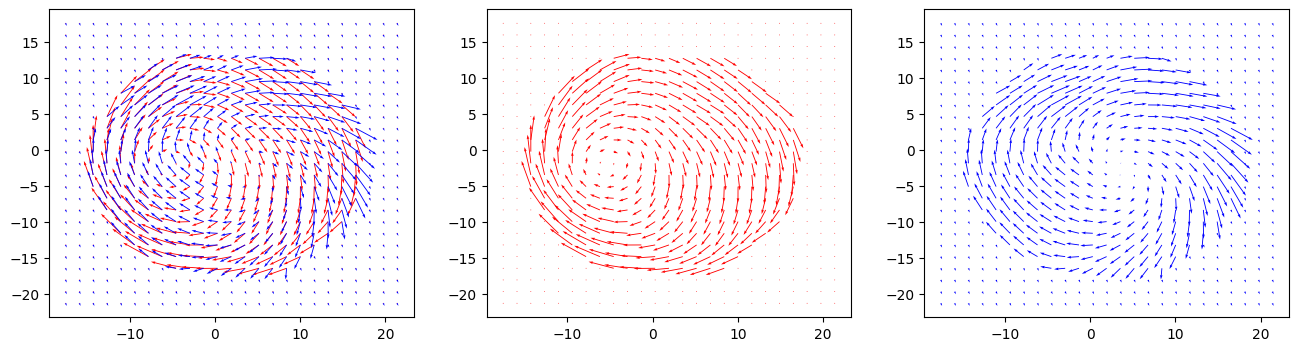

MI(average/percent):
0.837563487033892 0.7483870967741936
SI(average/percent):
0.8191220230063846 0.6806451612903226
86
MI(average/percent):
0.8364679058236711 0.7483870967741936
SI(average/percent):
0.8139541867097458 0.667741935483871
87
MI(average/percent):
0.8353650273964711 0.7419354838709677
SI(average/percent):
0.8085326482017388 0.6483870967741936
88
MI(average/percent):
0.8343723985052766 0.7354838709677419
SI(average/percent):
0.8046339758914003 0.632258064516129
89
MI(average/percent):
0.8335300440266186 0.7290322580645161
SI(average/percent):
0.8004102280601912 0.6129032258064516
90


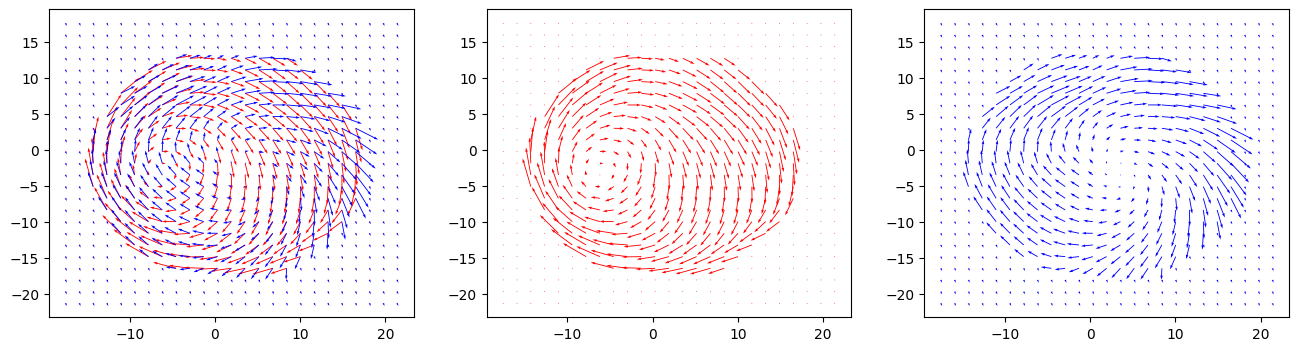

MI(average/percent):
0.8327981950482995 0.7193548387096774
SI(average/percent):
0.7963004361065689 0.6129032258064516
91
MI(average/percent):
0.833199082001888 0.7225806451612903
SI(average/percent):
0.7959237003489649 0.6064516129032258
92
MI(average/percent):
0.8333895660556977 0.7290322580645161
SI(average/percent):
0.7947551115144932 0.5935483870967742
93
MI(average/percent):
0.8334292214440358 0.7258064516129032
SI(average/percent):
0.7928897245590041 0.5903225806451613
94
MI(average/percent):
0.8333115038852782 0.7258064516129032
SI(average/percent):
0.7904491247676645 0.5838709677419355
95


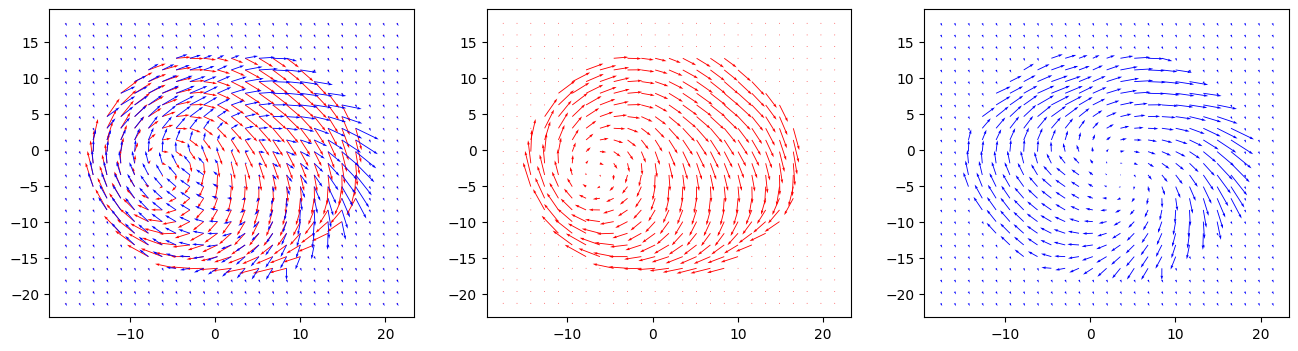

MI(average/percent):
0.8328252804438957 0.7225806451612903
SI(average/percent):
0.7874820623543516 0.5806451612903226
96
MI(average/percent):
0.8307701874317281 0.7129032258064516
SI(average/percent):
0.7836242696522678 0.5709677419354838
97
MI(average/percent):
0.8286058578275732 0.7096774193548387
SI(average/percent):
0.7800883535102177 0.5774193548387097
98
MI(average/percent):
0.8263411599534857 0.6967741935483871
SI(average/percent):
0.7768604028225805 0.5709677419354838
99
MI(average/percent):
0.8242383653801597 0.7
SI(average/percent):
0.7733064865142946 0.5709677419354838
100


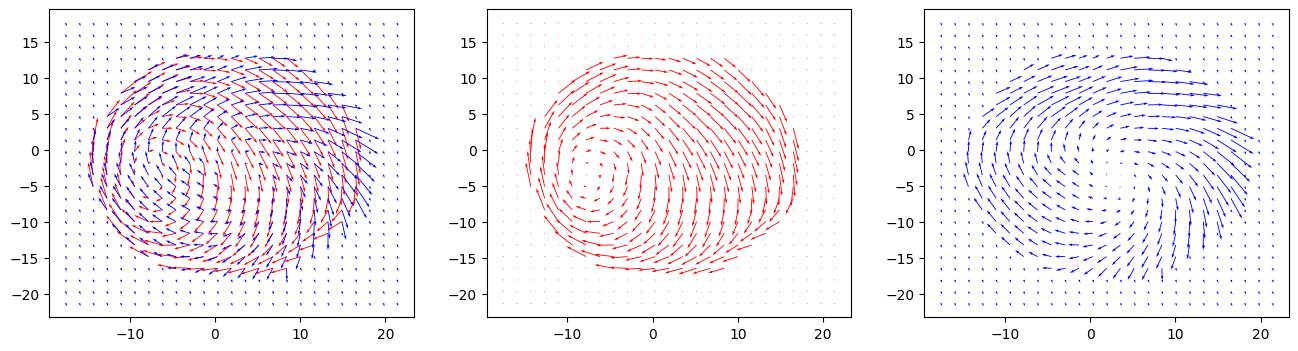

MI(average/percent):
0.8222212644904134 0.7
SI(average/percent):
0.7693617119322713 0.5612903225806452
101
MI(average/percent):
0.8224488020203315 0.6967741935483871
SI(average/percent):
0.7669299141793123 0.5580645161290323
102
MI(average/percent):
0.8226403147861858 0.6903225806451613
SI(average/percent):
0.7643906585559571 0.5451612903225806
103
MI(average/percent):
0.8227252839971999 0.6870967741935484
SI(average/percent):
0.7617391552844434 0.535483870967742
104
MI(average/percent):
0.8224460760548433 0.6838709677419355
SI(average/percent):
0.7590297668752959 0.5225806451612903
105


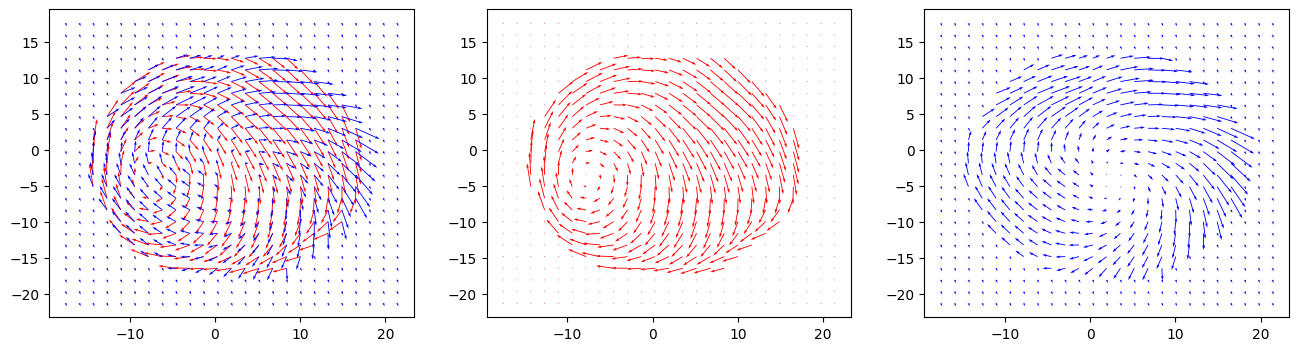

MI(average/percent):
0.822032780723702 0.6838709677419355
SI(average/percent):
0.7564937055875577 0.5258064516129032
106
MI(average/percent):
0.8224308353973379 0.6870967741935484
SI(average/percent):
0.7543960050445072 0.5193548387096775
107
MI(average/percent):
0.8227768803281799 0.6870967741935484
SI(average/percent):
0.7540871123772532 0.5129032258064516
108
MI(average/percent):
0.8228770630646409 0.6838709677419355
SI(average/percent):
0.7529432686871201 0.5
109
MI(average/percent):
0.8228729740712198 0.6806451612903226
SI(average/percent):
0.7509494829824785 0.5
110


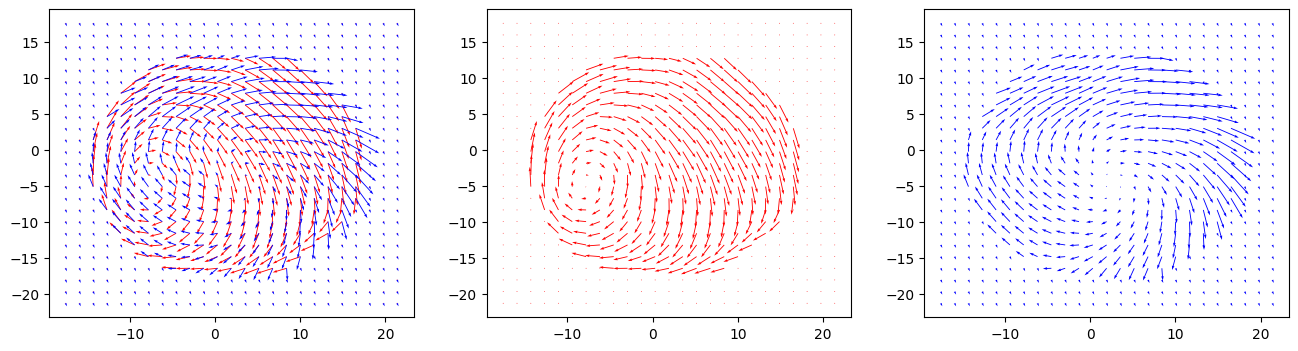

MI(average/percent):
0.8228807120138901 0.667741935483871
SI(average/percent):
0.7494701367161979 0.4967741935483871
111
MI(average/percent):
0.8215530634157763 0.667741935483871
SI(average/percent):
0.750934291642127 0.5
112
MI(average/percent):
0.8201872954084888 0.6548387096774193
SI(average/percent):
0.752327719812413 0.5096774193548387
113
MI(average/percent):
0.8187989325893713 0.6548387096774193
SI(average/percent):
0.7535478664498453 0.5161290322580645
114
MI(average/percent):
0.8173631319635134 0.6548387096774193
SI(average/percent):
0.7542884666890017 0.532258064516129
115


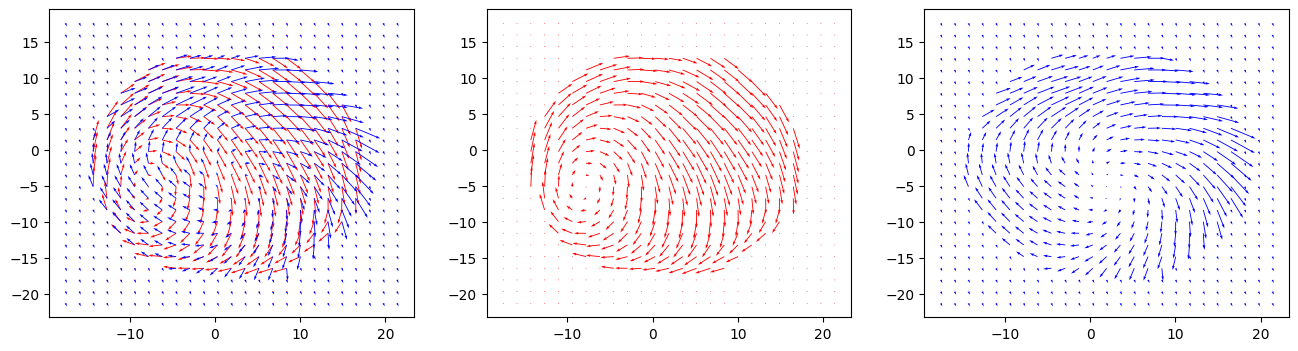

MI(average/percent):
0.8158264318152164 0.6483870967741936
SI(average/percent):
0.7544455706828627 0.5290322580645161
116
MI(average/percent):
0.8162841866177991 0.6516129032258065
SI(average/percent):
0.7542283912515108 0.535483870967742
117
MI(average/percent):
0.8165807706792407 0.6516129032258065
SI(average/percent):
0.7532465342384098 0.535483870967742
118
MI(average/percent):
0.8166390185786109 0.6645161290322581
SI(average/percent):
0.7527891108483216 0.5258064516129032
119
MI(average/percent):
0.8160678059387875 0.6580645161290323
SI(average/percent):
0.753290709642672 0.5258064516129032
120


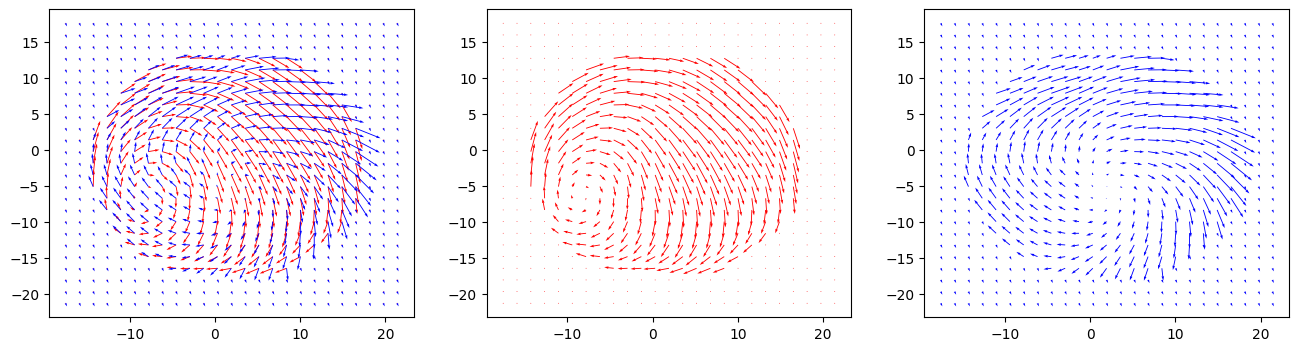

MI(average/percent):
0.81518431152541 0.6548387096774193
SI(average/percent):
0.7536967535409959 0.5193548387096775
121
MI(average/percent):
0.8128876749118535 0.6516129032258065
SI(average/percent):
0.7555692757706601 0.5290322580645161
122
MI(average/percent):
0.8104050997326211 0.6419354838709678
SI(average/percent):
0.7573410244940034 0.532258064516129
123
MI(average/percent):
0.8078570306959179 0.6290322580645161
SI(average/percent):
0.7589109114314554 0.5483870967741935
124
MI(average/percent):
0.8053193135262364 0.6290322580645161
SI(average/percent):
0.7601260186432529 0.5709677419354838
125


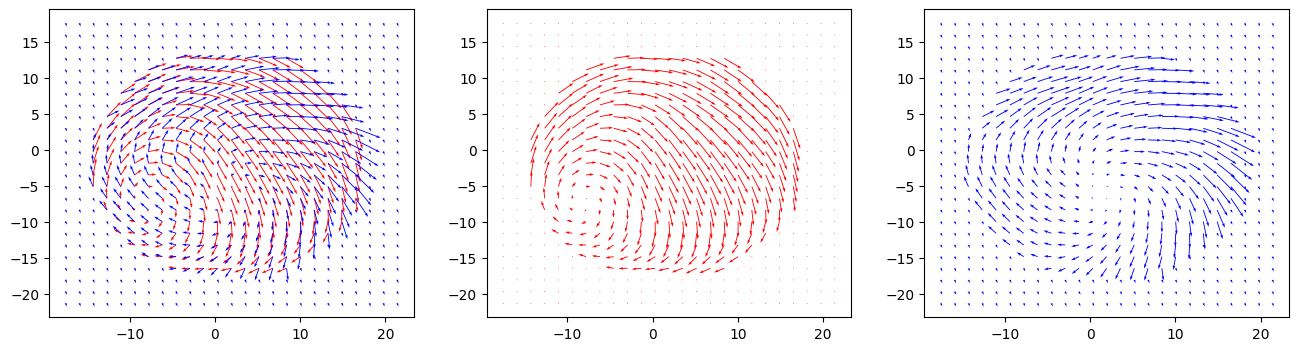

MI(average/percent):
0.8027553019823149 0.6161290322580645
SI(average/percent):
0.7606940093487968 0.5612903225806452
126
MI(average/percent):
0.8013459992121372 0.6064516129032258
SI(average/percent):
0.763857805007396 0.567741935483871
127
MI(average/percent):
0.7998113853963754 0.5967741935483871
SI(average/percent):
0.7671179646129418 0.5838709677419355
128
MI(average/percent):
0.7982581821479601 0.5838709677419355
SI(average/percent):
0.7696191848565739 0.5806451612903226
129
MI(average/percent):
0.7967348842053343 0.5806451612903226
SI(average/percent):
0.770818370693102 0.5903225806451613
130


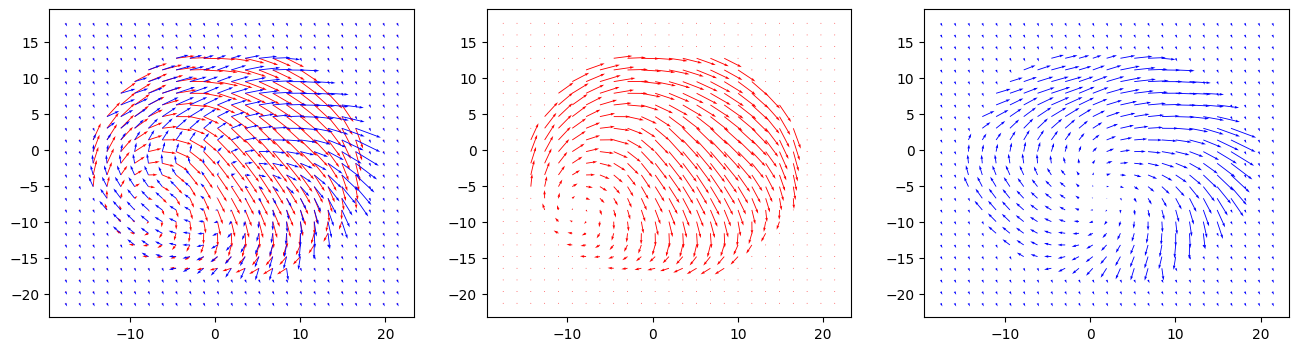

MI(average/percent):
0.7951516788369475 0.5903225806451613
SI(average/percent):
0.7714027155687858 0.5967741935483871
131
MI(average/percent):
0.7943888091627997 0.5741935483870968
SI(average/percent):
0.7724199523646151 0.6
132
MI(average/percent):
0.7935235736747903 0.5741935483870968
SI(average/percent):
0.7733411543578425 0.6064516129032258
133
MI(average/percent):
0.7926328631465127 0.5903225806451613
SI(average/percent):
0.7736589804204824 0.6064516129032258
134
MI(average/percent):
0.7917727189132142 0.6
SI(average/percent):
0.7732049045944047 0.6
135


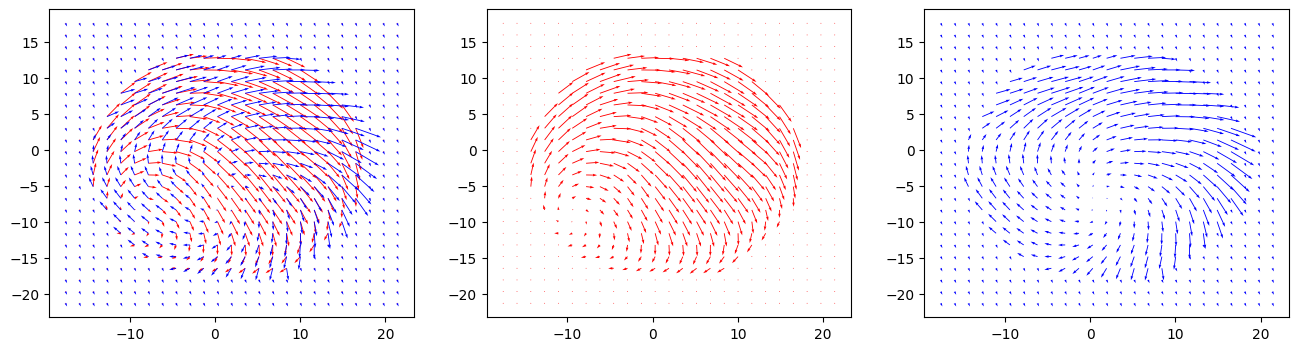

MI(average/percent):
0.791058509234012 0.5967741935483871
SI(average/percent):
0.7729205688528863 0.6129032258064516
136
MI(average/percent):
0.7883036501145079 0.6
SI(average/percent):
0.7762025328858941 0.6290322580645161
137
MI(average/percent):
0.7856875963937392 0.603225806451613
SI(average/percent):
0.7792037629288454 0.6387096774193548
138
MI(average/percent):
0.783266370949923 0.6
SI(average/percent):
0.7837157323363256 0.6419354838709678
139
MI(average/percent):
0.7810740932217932 0.6
SI(average/percent):
0.7861123294076099 0.6483870967741936
140


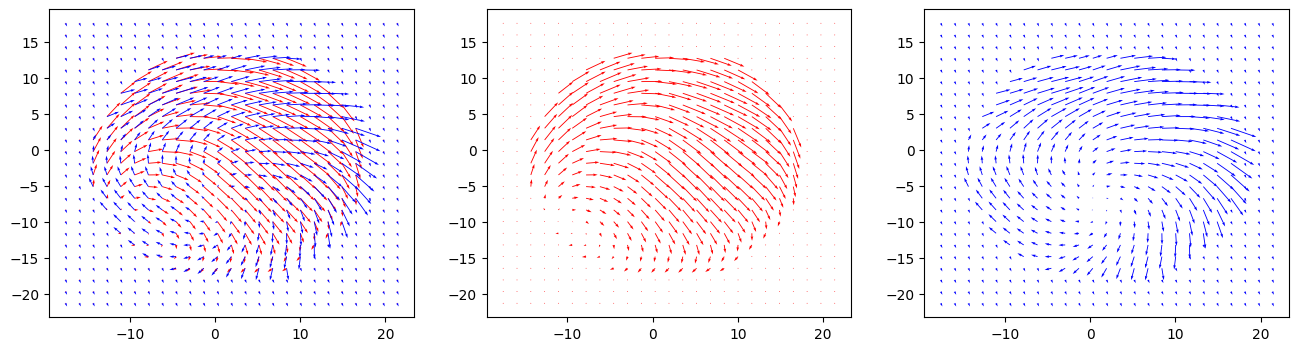

MI(average/percent):
0.7789837751508765 0.6064516129032258
SI(average/percent):
0.7873798599468484 0.6516129032258065
141
MI(average/percent):
0.7768924235985114 0.603225806451613
SI(average/percent):
0.7872606415555388 0.6516129032258065
142
MI(average/percent):
0.7749740807110166 0.5967741935483871
SI(average/percent):
0.7862575693150788 0.6580645161290323
143
MI(average/percent):
0.7734353849589599 0.603225806451613
SI(average/percent):
0.7845172164915167 0.6612903225806451
144
MI(average/percent):
0.7722542617443702 0.6064516129032258
SI(average/percent):
0.7839212688303995 0.6580645161290323
145


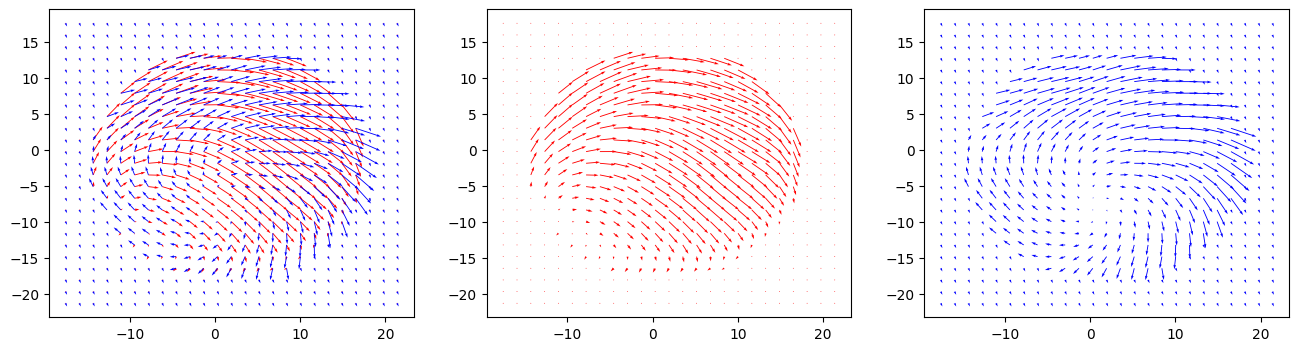

MI(average/percent):
0.7713695134692954 0.5935483870967742
SI(average/percent):
0.7833790509058265 0.6612903225806451


In [13]:
for i in range(p_tot):
    print(i)
    j=i
    if i%(addp)==0:
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 3, 1)
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],v_test[:,:,j,0],v_test[:,:,j,1],color='r')
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],pltpredict[:,:,j,0],pltpredict[:,:,j,1],color='b')
        plt.subplot(1, 3, 2)
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],v_test[:,:,j,0],v_test[:,:,j,1],color='r')
        #plt.quiver(spatial_grid[:,:,1],spatial_grid[:,:,0],pltpredict[:,:,i,0],pltpredict[:,:,i,1],color='b')
        plt.subplot(1, 3, 3)
        #plt.quiver(spatial_grid[:,:,1],spatial_grid[:,:,0],u_dot_train[:,:,i+1,0],u_dot_train[:,:,i+1,1],color='r')
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],pltpredict[:,:,j,0],pltpredict[:,:,j,1],color='b')
        plt.show()
    mi_t[i],mi_t_per[i]=miscore(pltpredict[:,:,j,],v_test[:,:,j,:])
    si_t[i],si_t_per[i]=siscore(pltpredict[:,:,j,],v_test[:,:,j,:])

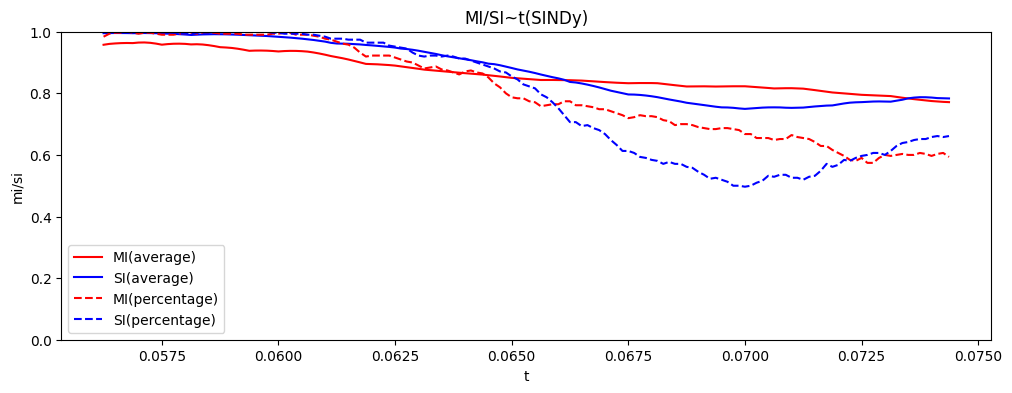

In [14]:
plt.figure(figsize=(12, 4))
plt.title('MI/SI~t(SINDy)')
plt.ylim(0,1)
plt.xlabel('t')
plt.ylabel('mi/si')
plt.plot(t_train,mi_t,'r',label='MI(average)')
plt.plot(t_train,si_t,'b',label='SI(average)')
plt.plot(t_train,mi_t_per,'r--',label='MI(percentage)')
plt.plot(t_train,si_t_per,'b--',label='SI(percentage)')
plt.legend()
plt.plot
plt.show()